In [130]:
# Essentials
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limit float output to 3 decimal places
import numpy as np

# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Stats
from scipy import stats
from scipy.stats import skew

## Load Ames Housing Datasets

In [138]:
pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows', None)

train = pd.read_csv('data/train.csv', index_col = 0)
test = pd.read_csv('data/test.csv', index_col = 0)

In [139]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL       65.000     8450   Pave   NaN      Reg   
2           20       RL       80.000     9600   Pave   NaN      Reg   
3           60       RL       68.000    11250   Pave   NaN      IR1   
4           70       RL       60.000     9550   Pave   NaN      IR1   
5           60       RL       84.000    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1      196.000        Gd        TA      PConc       Gd       TA           No   
2        0.000        TA        TA     CBlock       Gd       TA           Gd   
3      162.000        Gd        TA      PConc       Gd       TA           Mn   
4        0.000        TA        TA     BrkTil       TA       Gd           No   
5      350.000        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

In [136]:
test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH       80.000    11622   Pave   NaN      Reg   
1462          20       RL       81.000    14267   Pave   NaN      IR1   
1463          60       RL       74.000    13830   Pave   NaN      IR1   
1464          60       RL       78.000     9978   Pave   NaN      IR1   
1465         120       RL       43.000     5005   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1461         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1462         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1463         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1464         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1465         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1461       Norm     1Fam     1Story            5            6       1961   
1462       Norm     1Fam     1Story            6            6       1958   
1463       Norm     1Fam     2Story            5            5       1997   
1464       Norm     1Fam     2Story            6            6       1998   
1465       Norm   TwnhsE     1Story            8            5       1992   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1461          1961     Gable  CompShg     VinylSd     VinylSd       None   
1462          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1463          1998     Gable  CompShg     VinylSd     VinylSd       None   
1464          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1465          1992     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
1461       0.000        TA        TA     CBlock       TA       TA   
1462     108.000        TA        TA     CBlock       TA       TA   
1463       0.000        TA        TA      PConc       Gd       TA   
1464      20.000        TA        TA      PConc       TA       TA   
1465       0.000        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
Id                                                                    
1461           No          Rec     468.000          LwQ     144.000   
1462           No          ALQ     923.000          Unf       0.000   
1463           No          GLQ     791.000          Unf       0.000   
1464           No          GLQ     602.000          Unf       0.000   
1465           No          ALQ     263.000          Unf       0.000   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
Id                                                                     
1461    270.000      882.000    GasA        TA          Y      SBrkr   
1462    406.000     1329.000    GasA        TA          Y      SBrkr   
1463    137.000      928.000    GasA        Gd          Y      SBrkr   
1464    324.000      926.000    GasA        Ex          Y      SBrkr   
1465   1017.000     1280.000    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                              
1461       896         0             0        896         0.000         0.000   
1462      1329         0             0       1329         0.000         0.000   
1463       928       701             0       1629         0.000         0.000   
1464       926   

In [137]:
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


In [145]:
pd.options.display.max_rows = 2000
np.sum(train.isna())
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [143]:
app = {}
for col in train.columns:
    app[col] = train[col].isnull().sum()

In [19]:
a1 = {}
for key,val in app.items():
    if val > 0:
        a1[key] = val
    else:
        continue

In [7]:
a1

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [146]:
tr2= train.copy()
tst2= test.copy()

In [147]:
# remove columns with excessive NA
# mask = ['Alley','PoolQC','Fence', 'MiscFeature']
# realized Alley is actually categorical
mask = ['PoolQC','Fence', 'MiscFeature']

In [148]:
tr2 = tr2.drop(columns = mask)
tst2 = tst2.drop(columns = mask)

In [37]:
# tr2

In [150]:
tr2.shape
tst2.shape

(1459, 76)

In [30]:
f = open("data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [151]:
# pd.set_option('display.max_columns', None)
tr2.loc[:, tr2.dtypes == np.object]


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
Id                                                                              
1          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
5          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
6          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
7          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
8          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
9          RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
10         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
11         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
12         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
13         RL   Pave   NaN      IR2         Lvl    AllPub    Inside       Gtl   
14         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
15         RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
16         RM   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
17         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
18         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
19         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
20         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
21         RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
22         RM   Pave  Grvl      Reg         Bnk    AllPub    Inside       Gtl   
23         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
24         RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
25         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
26         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
27         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
28         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
29         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
30         RM   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
31    C (all)   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
32         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
33         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
34         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
35         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
36         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
37         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
38         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
39         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
40         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
41         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
42         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
43         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
44         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
45         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
46         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
47         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
48         FV   Pave   NaN      Reg 

## Visualize the dataset
Check numeric and categorical features 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001338C497C88>,
      dtype=object)

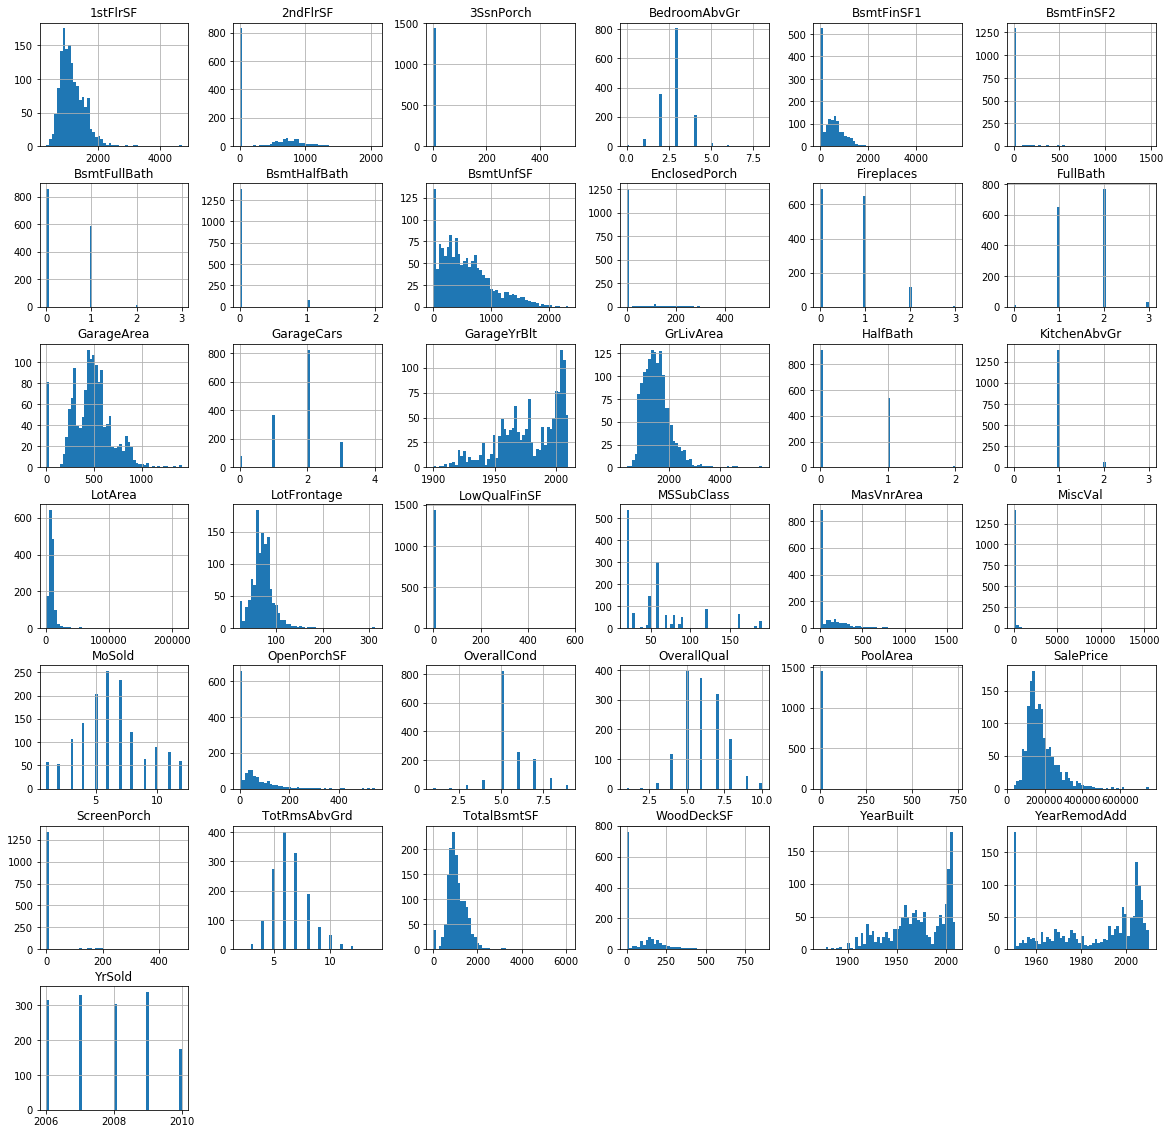

In [142]:
tr2.hist(bins=50, figsize=(20,20))

## Statistics 


In [152]:
tr2.describe().transpose()

count       mean       std       min        25%        50%  \
MSSubClass    1460.000     56.897    42.301    20.000     20.000     50.000   
LotFrontage   1201.000     70.050    24.285    21.000     59.000     69.000   
LotArea       1460.000  10516.828  9981.265  1300.000   7553.500   9478.500   
OverallQual   1460.000      6.099     1.383     1.000      5.000      6.000   
OverallCond   1460.000      5.575     1.113     1.000      5.000      5.000   
YearBuilt     1460.000   1971.268    30.203  1872.000   1954.000   1973.000   
YearRemodAdd  1460.000   1984.866    20.645  1950.000   1967.000   1994.000   
MasVnrArea    1452.000    103.685   181.066     0.000      0.000      0.000   
BsmtFinSF1    1460.000    443.640   456.098     0.000      0.000    383.500   
BsmtFinSF2    1460.000     46.549   161.319     0.000      0.000      0.000   
BsmtUnfSF     1460.000    567.240   441.867     0.000    223.000    477.500   
TotalBsmtSF   1460.000   1057.429   438.705     0.000    795.750    991.500   
1stFlrSF      1460.000   1162.627   386.588   334.000    882.000   1087.000   
2ndFlrSF      1460.000    346.992   436.528     0.000      0.000      0.000   
LowQualFinSF  1460.000      5.845    48.623     0.000      0.000      0.000   
GrLivArea     1460.000   1515.464   525.480   334.000   1129.500   1464.000   
BsmtFullBath  1460.000      0.425     0.519     0.000      0.000      0.000   
BsmtHalfBath  1460.000      0.058     0.239     0.000      0.000      0.000   
FullBath      1460.000      1.565     0.551     0.000      1.000      2.000   
HalfBath      1460.000      0.383     0.503     0.000      0.000      0.000   
BedroomAbvGr  1460.000      2.866     0.816     0.000      2.000      3.000   
KitchenAbvGr  1460.000      1.047     0.220     0.000      1.000      1.000   
TotRmsAbvGrd  1460.000      6.518     1.625     2.000      5.000      6.000   
Fireplaces    1460.000      0.613     0.645     0.000      0.000      1.000   
GarageYrBlt   1379.000   1978.506    24.690  1900.000   1961.000   1980.000   
GarageCars    1460.000      1.767     0.747     0.000      1.000      2.000   
GarageArea    1460.000    472.980   213.805     0.000    334.500    480.000   
WoodDeckSF    1460.000     94.245   125.339     0.000      0.000      0.000   
OpenPorchSF   1460.000     46.660    66.256     0.000      0.000     25.000   
EnclosedPorch 1460.000     21.954    61.119     0.000      0.000      0.000   
3SsnPorch     1460.000      3.410    29.317     0.000      0.000      0.000   
ScreenPorch   1460.000     15.061    55.757     0.000      0.000      0.000   
PoolArea      1460.000      2.759    40.177     0.000      0.000      0.000   
MiscVal       1460.000     43.489   496.123     0.000      0.000      0.000   
MoSold        1460.000      6.322     2.704     1.000      5.000      6.000   
YrSold        1460.000   2007.816     1.328  2006.000   2007.000   2008.000   
SalePrice     1460.000 180921.196 79442.503 34900.000 129975.000 163000.000   

                     75%        max  
MSSubClass        70.000    190.000  
LotFrontage       80.000    313.000  
LotArea        11601.500 215245.000  
OverallQual        7.000     10.000  
OverallCond        6.000      9.000  
YearBuilt       2000.000   2010.000  
YearRemodAdd    2004.000   2010.000  
MasVnrArea       166.000   1600.000  
BsmtFinSF1       712.250   5644.000  
BsmtFinSF2         0.000   1474.000  
BsmtUnfSF        808.000   2336.000  
TotalBsmtSF     1298.250   6110.000  
1stFlrSF        1391.250   4692.000  
2ndFlrSF         728.000   2065.000  
LowQualFinSF       0.000    572.000  
GrLivArea       1776.750   5642.000  
BsmtFullBath       1.000      3.000  
BsmtHalfBath       0.000      2.000  
FullBath           2.000      3.000  
HalfBath           1.000      2.000  
BedroomAbvGr       3.000      8.000  
KitchenAbvGr       1.000      3.000  
TotRmsAbvGrd       7.000     14.000  
Fireplaces         1.000      3.000  
GarageYrBlt     2002.000   2010.000  
GarageCars         2.000  

In [78]:
tr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [153]:
# create training df of only columns 0-25, 75
df_AD = tr2.drop(tr2.columns[26:76], axis=1)
tst_AD = tst2.drop(tst2.columns[26:], axis=1)

In [155]:
print(df_AD.head())
print(tst_AD.head())

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL       65.000     8450   Pave   NaN      Reg   
2           20       RL       80.000     9600   Pave   NaN      Reg   
3           60       RL       68.000    11250   Pave   NaN      IR1   
4           70       RL       60.000     9550   Pave   NaN      IR1   
5           60       RL       84.000    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm  

In [124]:
df_AD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Street        1460 non-null   object 
 5   Alley         91 non-null     object 
 6   LotShape      1460 non-null   object 
 7   LandContour   1460 non-null   object 
 8   Utilities     1460 non-null   object 
 9   LotConfig     1460 non-null   object 
 10  LandSlope     1460 non-null   object 
 11  Neighborhood  1460 non-null   object 
 12  Condition1    1460 non-null   object 
 13  Condition2    1460 non-null   object 
 14  BldgType      1460 non-null   object 
 15  HouseStyle    1460 non-null   object 
 16  OverallQual   1460 non-null   int64  
 17  OverallCond   1460 non-null   int64  
 18  YearBuilt     1460 non-null 

In [125]:
# borrowed code from kaggle. based on R's str function

def r_str(df, pred=None):
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    unique = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distinct = df.apply(lambda x: x.unique().shape[0])
    missing_ratio = (df.isnull().sum()/ obs * 100)
    skewed = df.skew()
    kurtosis = df.kurt()
    print("Data shape: ", df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distinct', 'nulls', 'missing_ratio', 'unique', 'skewed', 'kurtosis']
        str = pd.concat([types, counts, distinct, nulls, missing_ratio, unique, skewed, kurtosis], axis = 1)
    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distinct, nulls, missing_ratio, unique, skewed, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr ' + pred
        cols = ['types', 'counts', 'distinct', 'nulls', 'missing_ratio', 'unique', 'skewed', 'kurtosis', corr_col]

    str.columns = cols
    dtypes = str.types.value_counts()
    print('--'*20, '\nData types:\n', str.types.value_counts())
    print('--'*20)
    return str

In [195]:
details = r_str(df_AD, 'SalePrice')
display(details.sort_values(by='corr SalePrice', ascending=False))
# display(details)

Data shape:  (1460, 27)
---------------------------------------- 
Data types:
 float64    16
int64       8
object      3
Name: types, dtype: int64
----------------------------------------


types  counts  distinct  nulls  missing_ratio  \
SalePrice     float64    1460       663      0          0.000   
OverallQual     int64    1460        10      0          0.000   
YearBuilt       int64    1460       112      0          0.000   
YearRemodAdd    int64    1460        61      0          0.000   
MasVnrArea    float64    1452       328      8          0.548   
LotFrontage   float64    1201       111    259         17.740   
LotArea         int64    1460      1073      0          0.000   
Exterior2nd   float64    1335        13    125          8.562   
Exterior1st     int64    1460        15      0          0.000   
RoofMatl        int64    1460         8      0          0.000   
OverallCond     int64    1460         9      0          0.000   
MSSubClass      int64    1460        15      0          0.000   
MasVnrType    float64    1452         5      8          0.548   
MSZoning      float64       0         1   1460        100.000   
Street        float64       0         1   1460        100.000   
Alley         float64       0         1   1460        100.000   
LotShape      float64       0         1   1460        100.000   
LandContour   float64       0         1   1460        100.000   
Utilities      object    1460         2      0          0.000   
LotConfig      object    1460         5      0          0.000   
LandSlope     float64       0         1   1460        100.000   
Neighborhood   object    1460        25      0          0.000   
Condition1    float64       0         1   1460        100.000   
Condition2    float64       0         1   1460        100.000   
BldgType      float64       0         1   1460        100.000   
HouseStyle    float64       0         1   1460        100.000   
RoofStyle     float64       0         1   1460        100.000   

                                                         unique  skewed  \
SalePrice     [[12.24769911637256, 12.109016442313738, 12.31...   0.121   
OverallQual                   [[7, 6, 8, 5, 9, 4, 10, 3, 1, 2]]   0.217   
YearBuilt     [[2003, 1976, 2001, 1915, 2000, 1993, 2004, 19...  -0.613   
YearRemodAdd  [[2003, 1976, 2002, 1970, 2000, 1995, 2005, 19...  -0.504   
MasVnrArea    [[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286....   2.669   
LotFrontage   [[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, na...   2.164   
LotArea       [[8450, 9600, 11250, 9550, 14260, 14115, 10084...  12.208   
Exterior2nd   [[15.0, 9.0, nan, 7.0, 11.0, 16.0, 4.0, 14.0, ...  -0.525   
Exterior1st   [[15, 9, 16, 7, 4, 17, 6, 11, 1, 14, 3, 2, 13,...  -0.541   
RoofMatl                             [[2, 8, 4, 7, 3, 6, 5, 1]]   8.109   
OverallCond                       [[5, 8, 6, 7, 4, 2, 3, 9, 1]]   0.693   
MSSubClass    [[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80...   1.408   
MasVnrType                          [[2.0, 4.0, 5.0, 1.0, nan]]  -0.557   
MSZoning                                                [[nan]]     nan   
Street                                                  [[nan]]     nan   
Alley                                                   [[nan]]     nan   
LotShape                                                [[nan]]     nan   
LandContour                                             [[nan]]     nan   
Utilities                                    [[AllPub, NoSeWa]]     nan   
LotConfig                 [[Inside, FR2, Corner, CulDSac, FR3]]     nan   
LandSlope                                               [[nan]]     nan   
Neighborhood  [[CollgCr, Veenker, Crawfor, NoRidge, Mitchel,...     nan   
Condition1                                              [[nan]]     nan   
Condition2                                              [[nan]]     nan   
BldgType                                                [[nan]]     nan   
HouseStyle                                              [[nan]]     nan   
RoofStyle                                               [[nan]]     nan   

              kurtosis  corr SalePrice  
SalePrice        0.810           1.000  
OverallQual 

In [156]:
display(tst_AD.describe().transpose())

count     mean      std      min      25%      50%       75%  \
MSSubClass   1459.000   57.378   42.747   20.000   20.000   50.000    70.000   
LotFrontage  1232.000   68.580   22.377   21.000   58.000   67.000    80.000   
LotArea      1459.000 9819.161 4955.517 1470.000 7391.000 9399.000 11517.500   
OverallQual  1459.000    6.079    1.437    1.000    5.000    6.000     7.000   
OverallCond  1459.000    5.554    1.114    1.000    5.000    5.000     6.000   
YearBuilt    1459.000 1971.358   30.390 1879.000 1953.000 1973.000  2001.000   
YearRemodAdd 1459.000 1983.663   21.130 1950.000 1963.000 1992.000  2004.000   
MasVnrArea   1444.000  100.709  177.626    0.000    0.000    0.000   164.000   

                   max  
MSSubClass     190.000  
LotFrontage    200.000  
LotArea      56600.000  
OverallQual     10.000  
OverallCond      9.000  
YearBuilt     2010.000  
YearRemodAdd  2010.000  
MasVnrArea    1290.000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001338B0B8308>,
      dtype=object)

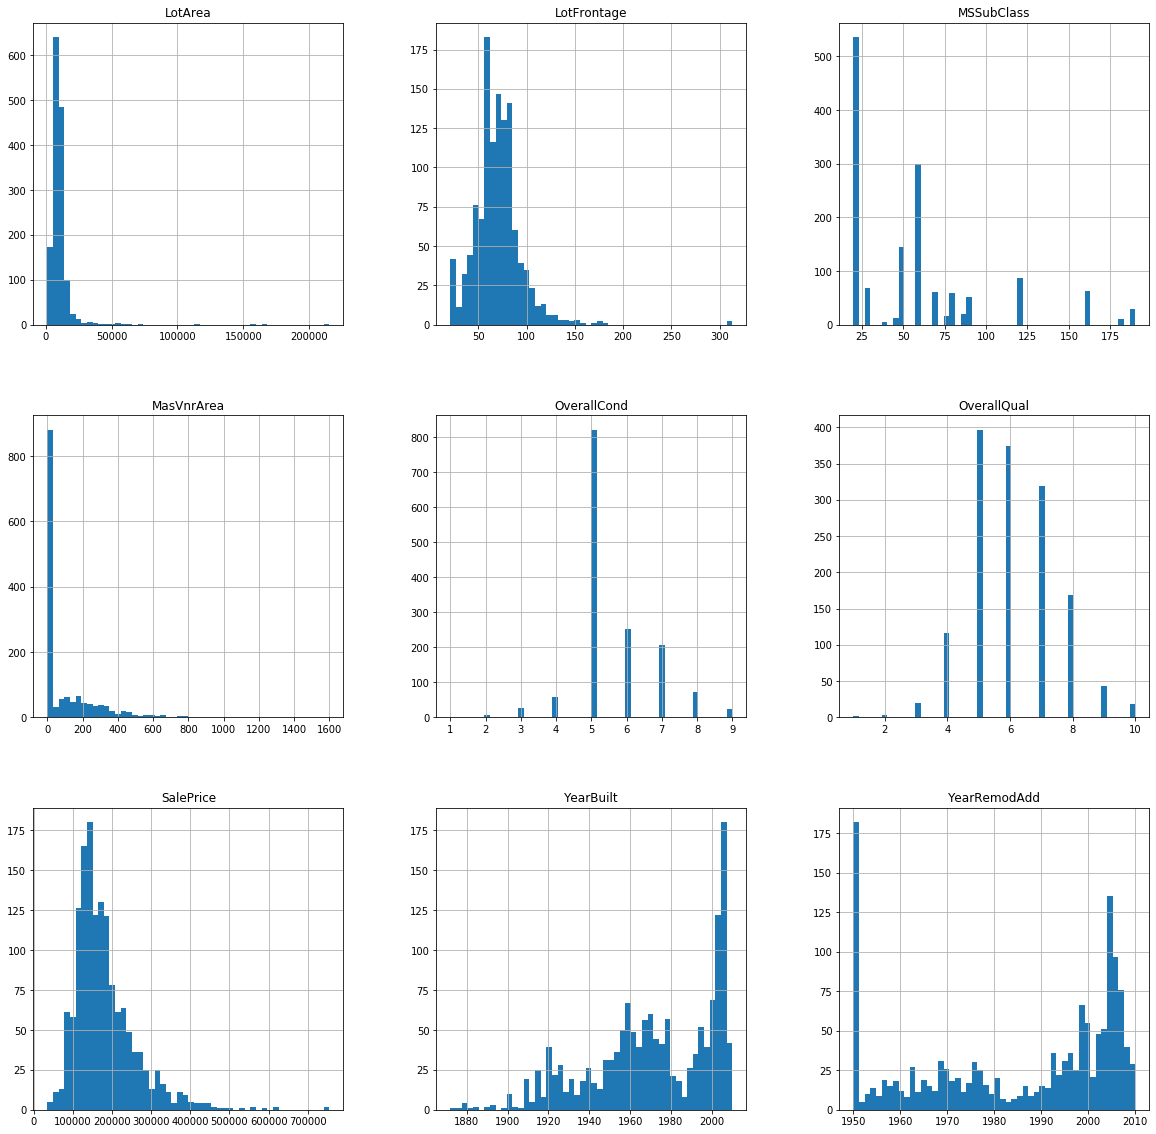

In [127]:
df_AD.hist(bins=50, figsize=(20,20))

In [55]:
# numeric features overview
numeric_type = ['int64', 'float64']
numeric = []
for i in df_AD.columns:
    if df_AD[i].dtype in numeric_type:
        numeric.append(i)
    else:
        continue

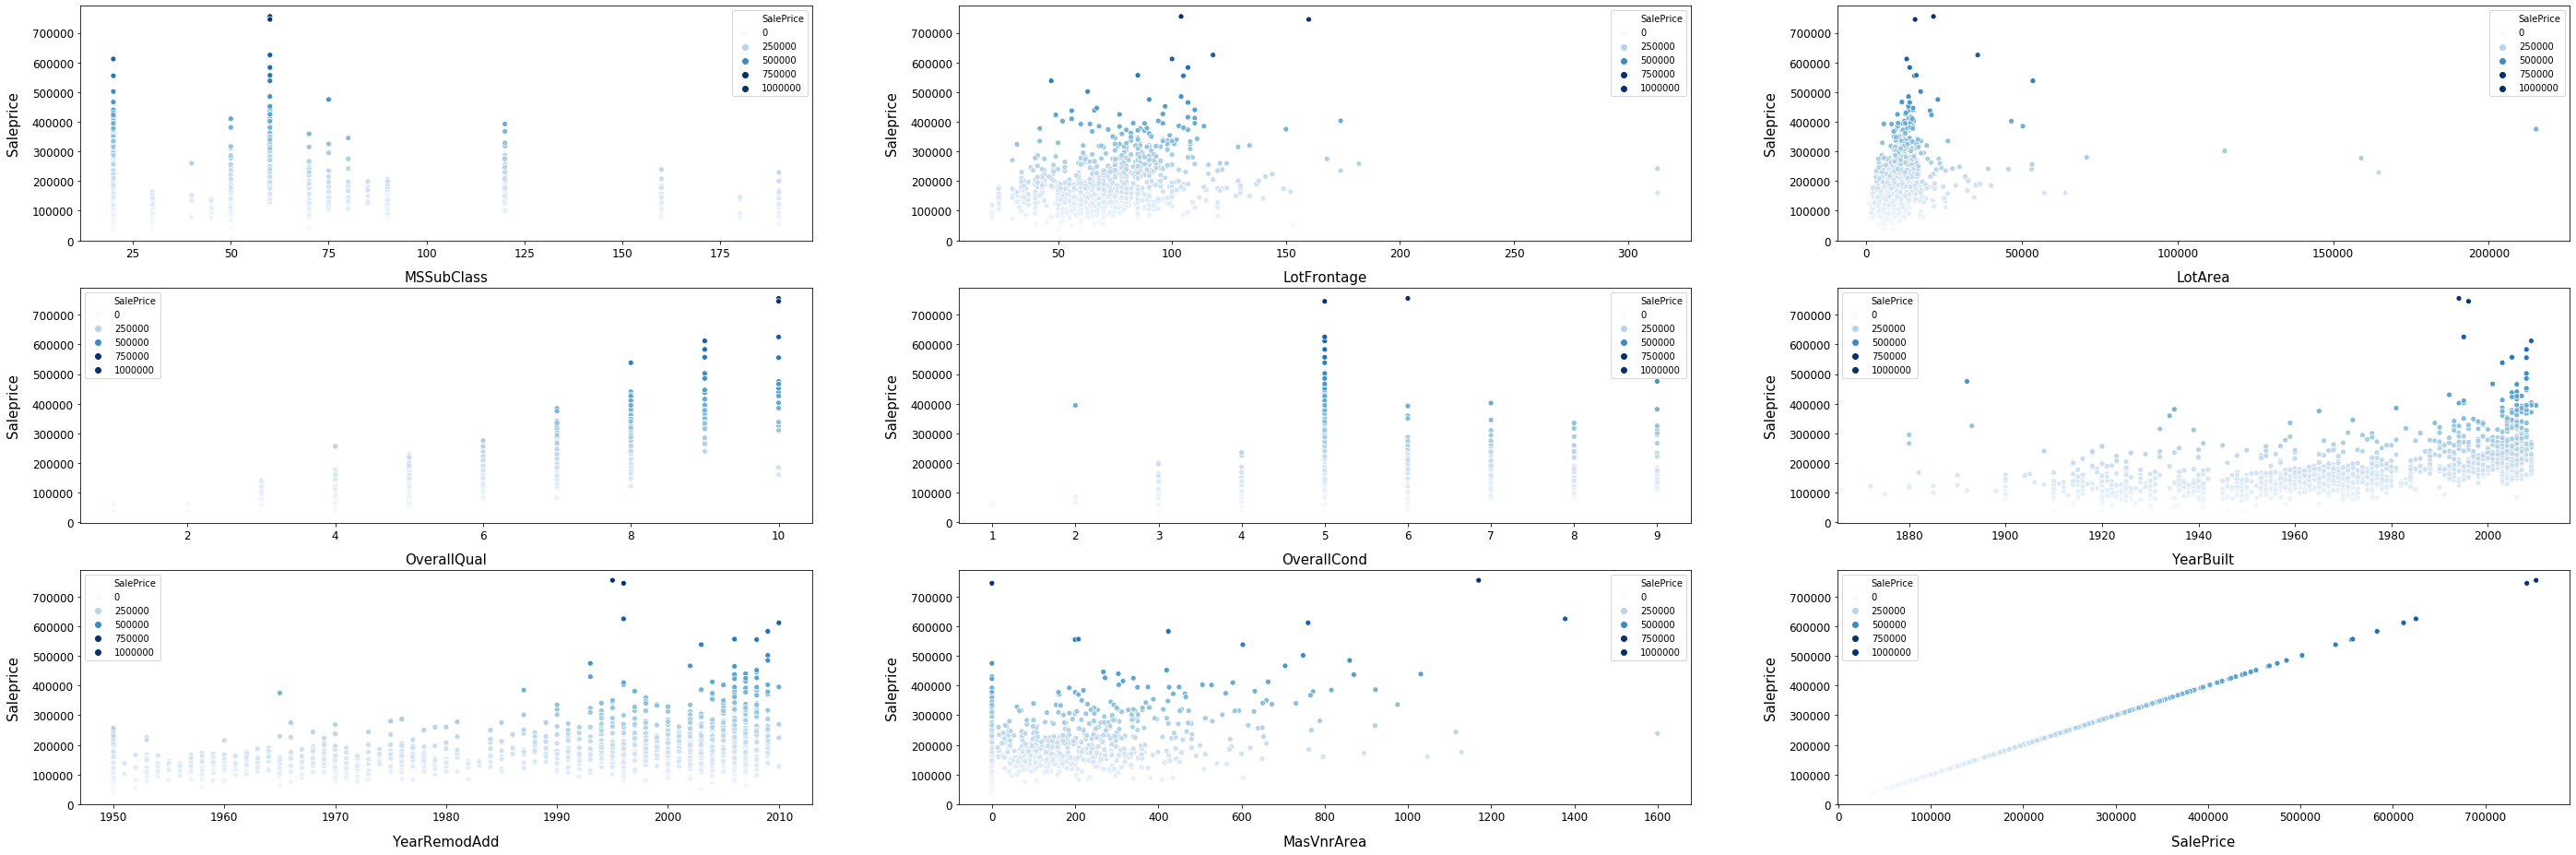

In [157]:
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(20,20))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette('husl', 8)
for i, feature in enumerate(list(df_AD[numeric]), 1):
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=df_AD)
    
    plt.xlabel('{}'.format(feature), size=15, labelpad=12.5)
    plt.ylabel('Saleprice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
        
    plt.legend(loc='best', prop={'size': 10})

plt.show()


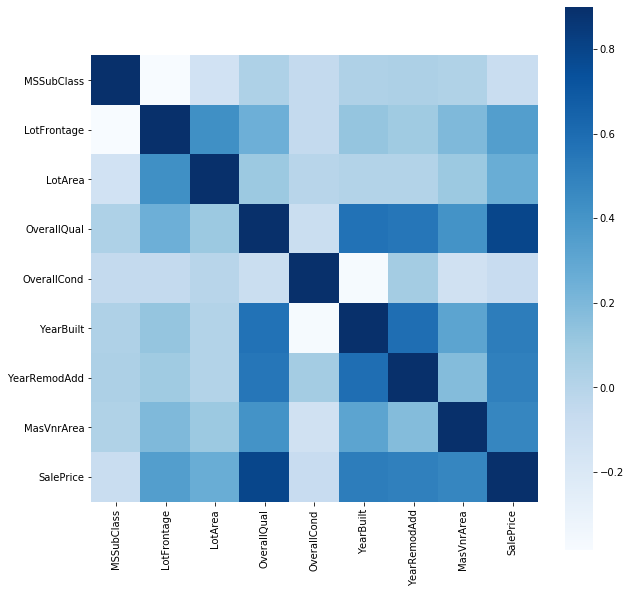

In [120]:
corr = df_AD.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=0.9, cmap='Blues', square=True)

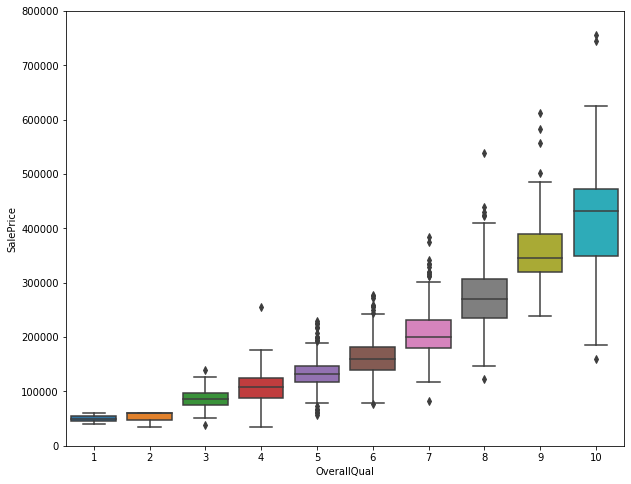

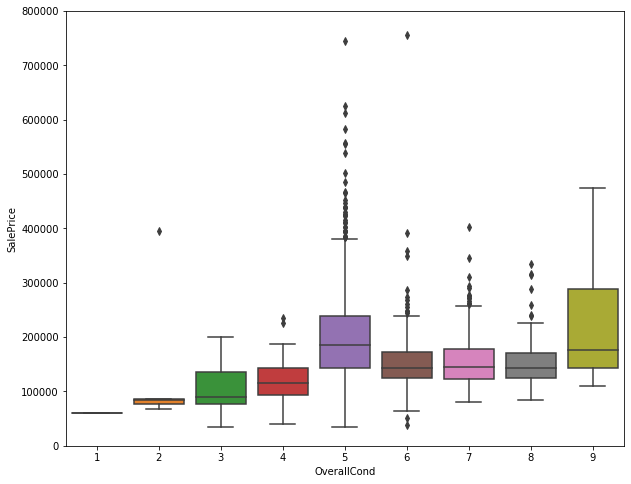

In [65]:
# Relationship btn SalePrice and OverallQual (building materials quality)

data = pd.concat([df_AD['SalePrice'], df_AD['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=df_AD['OverallQual'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# Relationship btn SalePrice and OverallCond (condition of house)
data = pd.concat([df_AD['SalePrice'], df_AD['OverallCond']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=df_AD['OverallCond'], y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

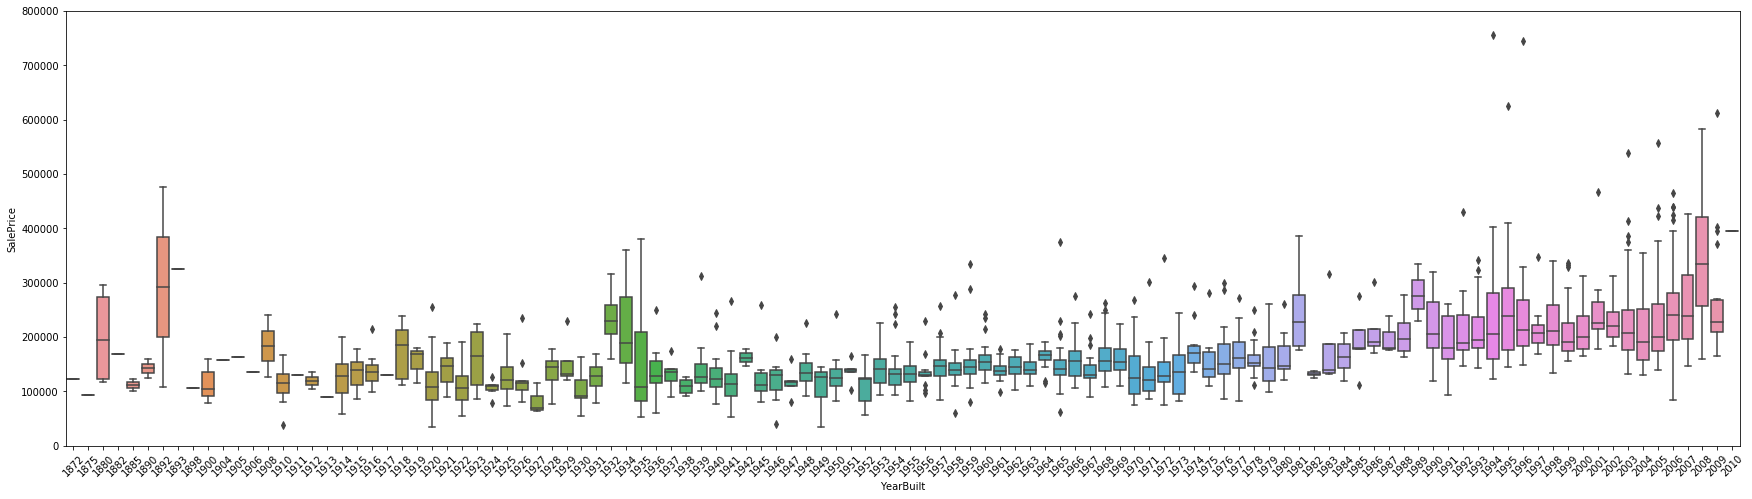

In [70]:
# Relationship between SalePrice and YearBuilt
data = pd.concat([df_AD['SalePrice'], df_AD['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(30, 8))
fig = sns.boxplot(x=df_AD['YearBuilt'], y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=45);

In [158]:
feat = []
feat = df_AD.columns.tolist()

In [165]:
# feat

#### Feature types

Quantitative:
- 0   MSSubClass    1460 non-null   int64
- 2   LotFrontage   1201 non-null   float64
- 3   LotArea       1460 non-null   int64  
- 18  YearBuilt     1460 non-null   int64  
- 19  YearRemodAdd  1460 non-null   int64  
- 25  MasVnrArea    1452 non-null   float64
- 26  SalePrice     1460 non-null   int64  

Ordinal Categorical:
- 1   MSZoning      1460 non-null   object 
- 4   Street        1460 non-null   object 
- 5   Alley         91   non-null   object 
- 6   LotShape      1460 non-null   object 
- 7   LandContour   1460 non-null   object 
- 8   Utilities     1460 non-null   object 
- 9   LotConfig     1460 non-null   object 
- 10  LandSlope     1460 non-null   object 
- 11  Neighborhood  1460 non-null   object 
- 12  Condition1    1460 non-null   object 
- 13  Condition2    1460 non-null   object 
- 14  BldgType      1460 non-null   object 
- 15  HouseStyle    1460 non-null   object 
- 20  RoofStyle     1460 non-null   object 
- 21  RoofMatl      1460 non-null   object 
- 22  Exterior1st   1460 non-null   object 
- 23  Exterior2nd   1460 non-null   object 
- 24  MasVnrType    1452 non-null   object 

Nominal Categorical:
- 16  OverallQual   1460 non-null   int64  
- 17  OverallCond   1460 non-null   int64

In [160]:
quant = ['MSSubClass', 'LotFrontage',
         'LotArea', 'YearBuilt',
         'YearRemodAdd', 'MasVnrArea',
         'SalePrice']

In [161]:
ord_cat = ['MSZoning', 'Street', 'Alley', 'LotShape',
           'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
           'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
           'Exterior2nd', 'MasVnrType']

In [162]:
nom_cat = ['OverallQual', 'OverallCond']

In [163]:
for i in ord_cat:
    print(df_AD[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

In [164]:
for i in nom_cat:
    print (df_AD[i].value_counts())

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000133922C9EC8>,
      dtype=object)

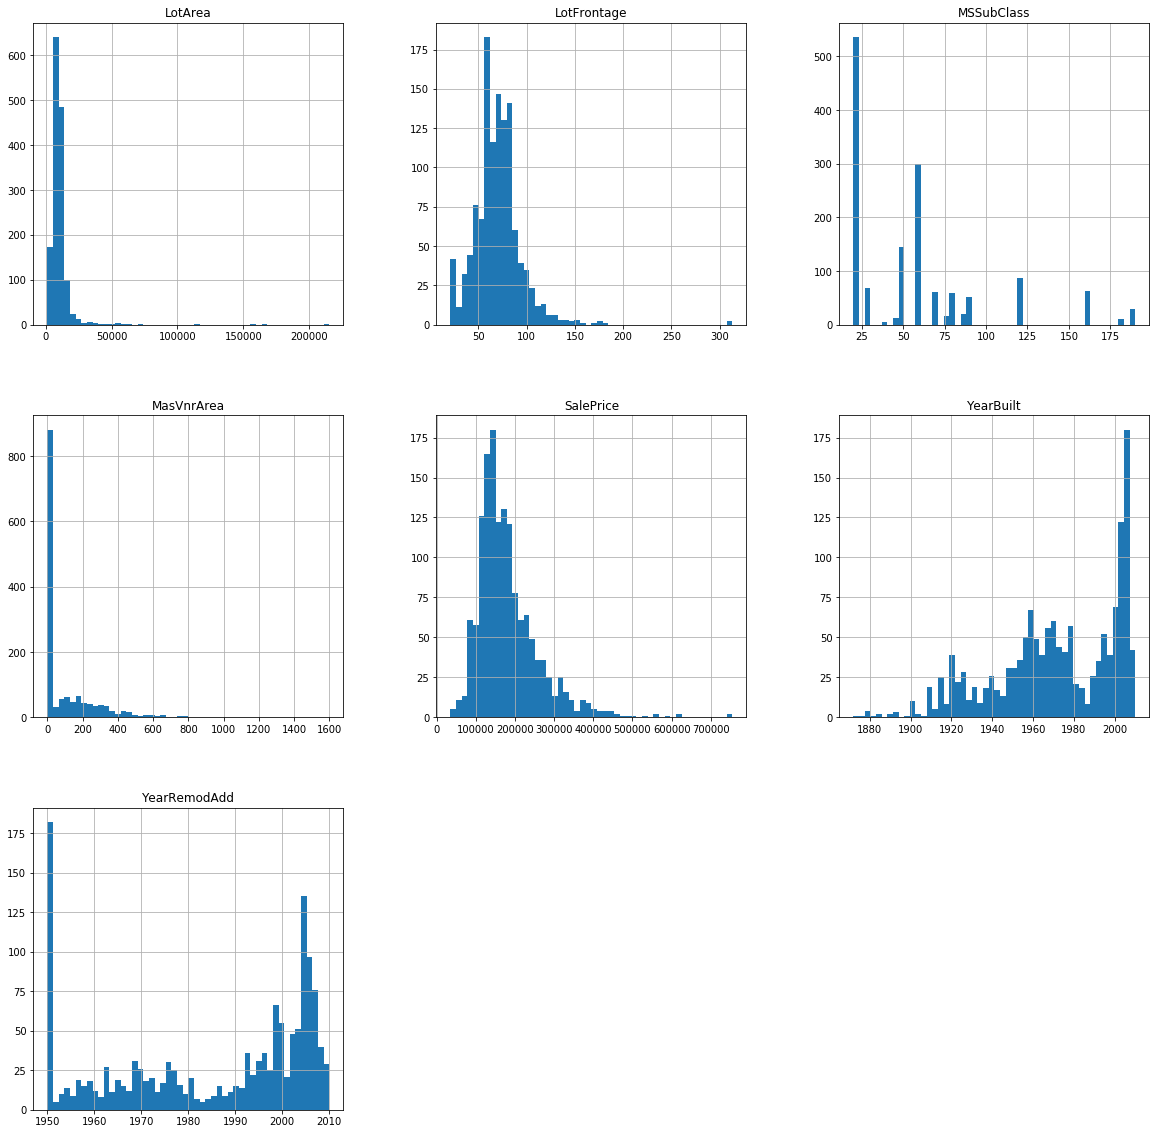

In [169]:
df_AD[quant].hist(bins=50, figsize=(20,20))

In [172]:
df_AD['SalePrice'] = np.log1p(df_AD['SalePrice'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001338C496A88>,
      dtype=object)

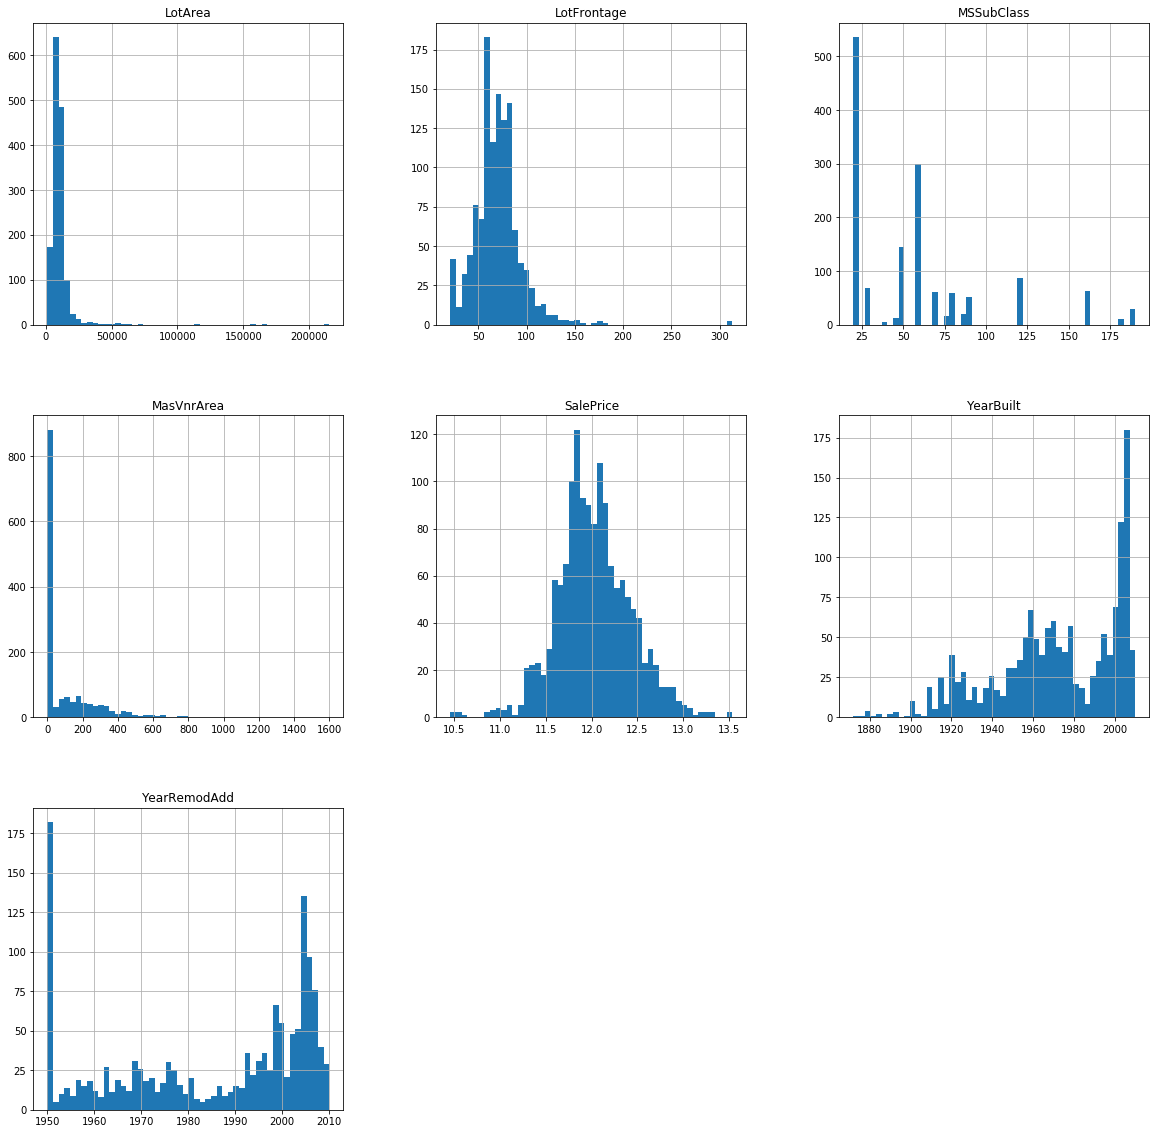

In [173]:
df_AD[quant].hist(bins=50, figsize=(20,20))

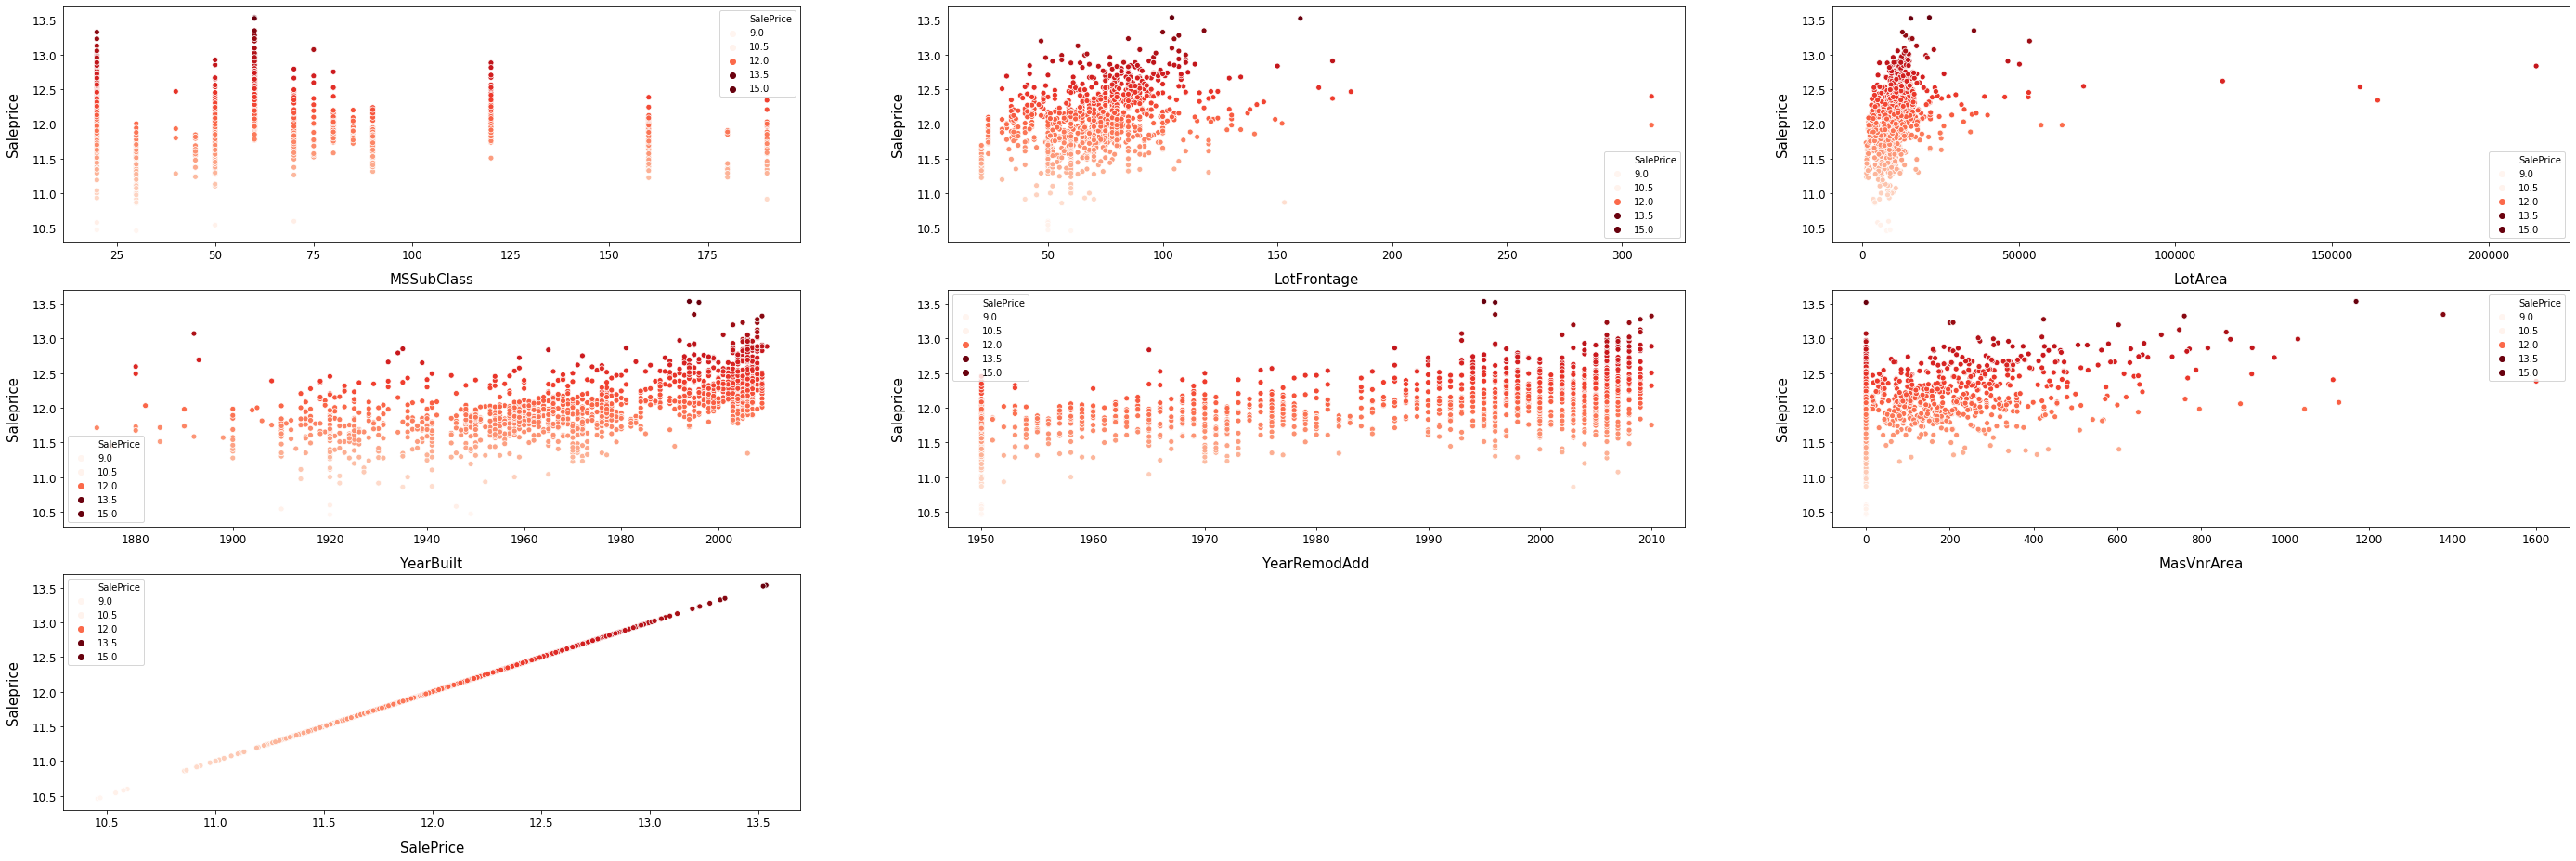

In [175]:
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(20,20))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette('husl', 8)
for i, feature in enumerate(list(df_AD[quant]), 1):
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Reds', data=df_AD)
    
    plt.xlabel('{}'.format(feature), size=15, labelpad=12.5)
    plt.ylabel('Saleprice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
        
    plt.legend(loc='best', prop={'size': 10})

plt.show()


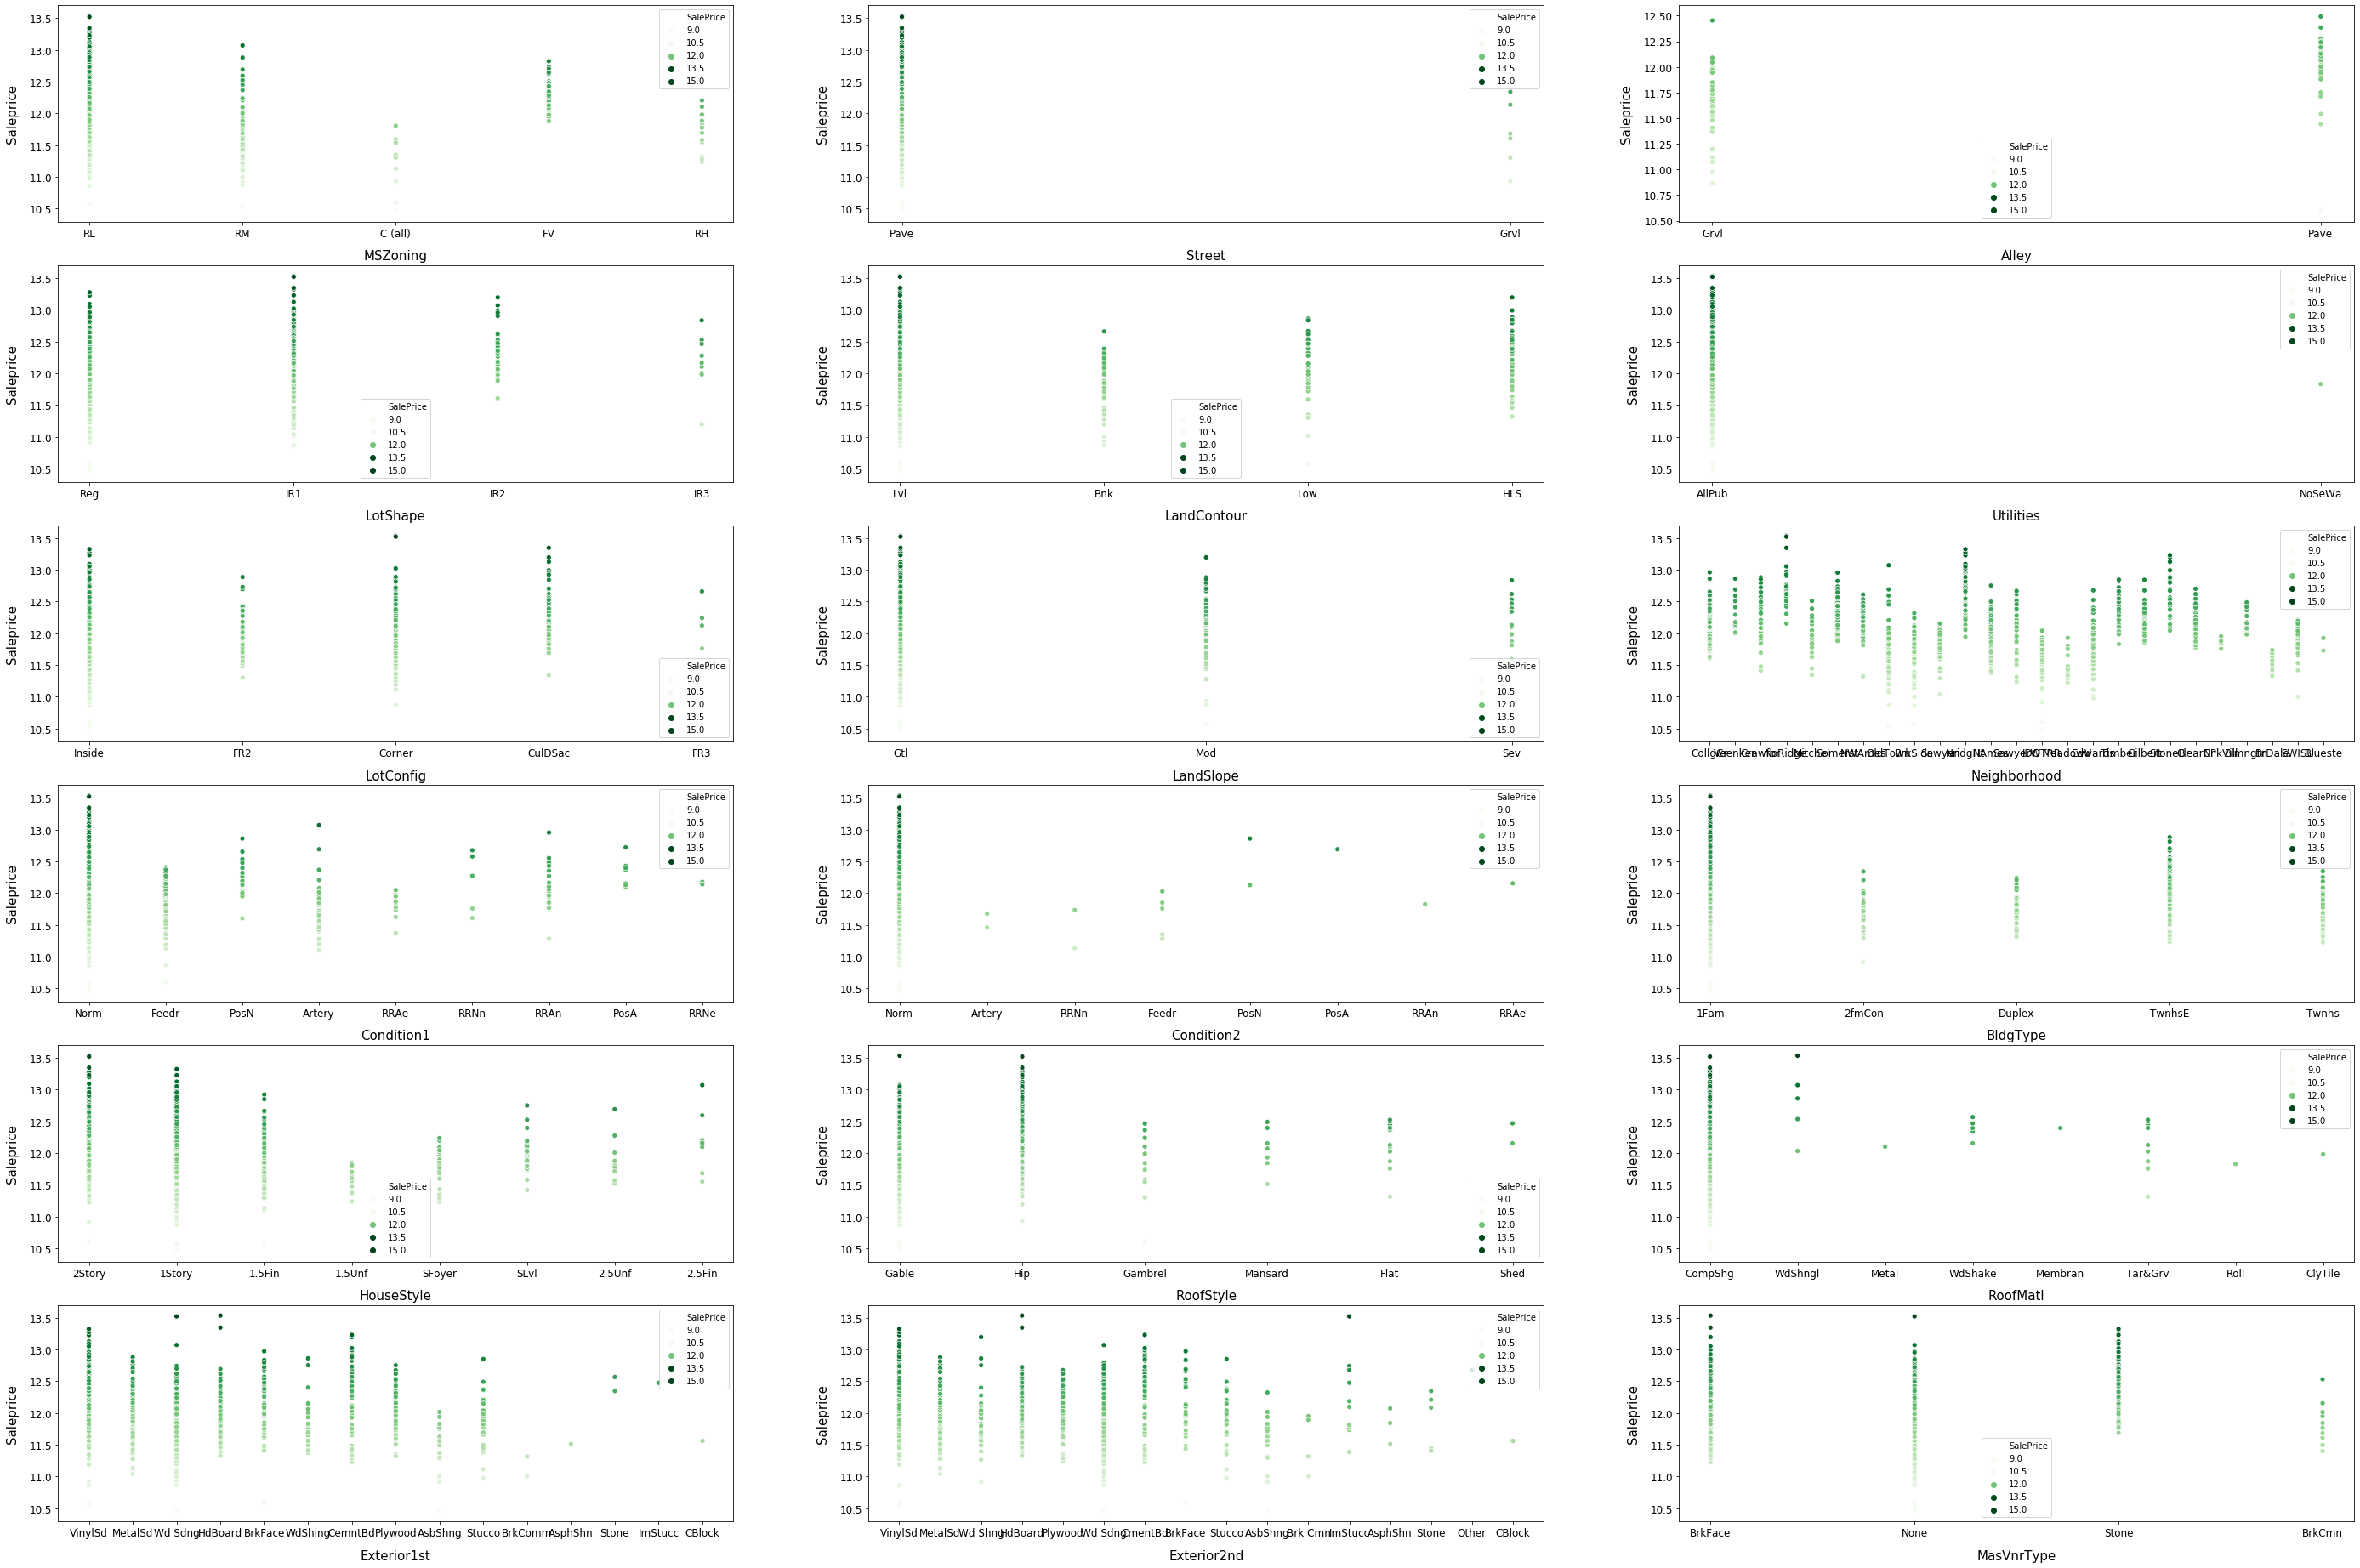

In [181]:
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(20,20))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette('husl', 8)
for i, feature in enumerate(list(df_AD[ord_cat]), 1):
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Greens', data=df_AD)
    
    plt.xlabel('{}'.format(feature), size=15, labelpad=12.5)
    plt.ylabel('Saleprice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
        
    plt.legend(loc='best', prop={'size': 10})

plt.show()

In [187]:
df_AD['Street'].sample(20)

Id
1103    Pave
306     Pave
156     Pave
1277    Pave
212     Pave
1145    Pave
416     Pave
999     Pave
1171    Pave
991     Pave
596     Pave
1153    Pave
627     Pave
1309    Pave
332     Pave
771     Pave
1163    Pave
537     Pave
749     Pave
48      Pave
Name: Street, dtype: object

In [176]:
print(ord_cat)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType']


#### Modify Ordinals 

In [189]:
    # MSZoning: General zoning of the sale
    # MSZoning: Identifies the general zoning classification of the sale.
    MSZoning = {}
    MSZoning['C \"all\"'] = 5 # 'C (all) Commercial'
    MSZoning['FV'] = 4 # FV	Floating Village Residential
    MSZoning['RH'] = 3 # RH	Residential High Density
    MSZoning['RM'] = 2 # RM	Residential Medium Density
    MSZoning['RL'] = 1 # RL	Residential Low Density
    
    df_AD.MSZoning = df_AD.MSZoning.map(MSZoning)
    
    # Street: Type of road access to property
    Street = {}
    Street['Grvl'] = 1 # Gravel
    Street['Pave'] = 2 # Paved

    df_AD.Street = df_AD.Street.map(Street)
    
    # Alley: Type of alley access to property
    Alley = {}
    Alley['Grvl'] = 3 # Grvl	Gravel
    Alley['Pave'] = 2 # Pave	Paved
    Alley['NA'] = 1 # NA 	No alley access
    
    df_AD.Alley = df_AD.Alley.map(Alley)
    
    # LotShape: General shape of property
    LotShape = {}
    LotShape['Reg'] = 1 # Reg	Regular	
    LotShape['IR1'] = 2 # IR1	Slightly irregular
    LotShape['IR2'] = 3 # IR2	Moderately Irregular
    LotShape['IR3'] = 4 # IR3	Irregular

    df_AD.LotShape = df_AD.LotShape.map(LotShape)
       
    # LandContour: Flatness of the property
    LandContour = {}
    LandContour['Lvl'] = 1 # Lvl	Near Flat/Level	
    LandContour['Bnk'] = 2 # Bnk	Banked - Quick and significant rise from street grade to building
    LandContour['HLS'] = 3 # HLS	Hillside - Significant slope from side to side
    LandContour['Low'] = 4 # Low	Depression

    df_AD.LandContour = df_AD.LandContour.map(LandContour)

    # Utilities: Type of utilities available
    Utilities = {}
    Utilities['AllPub'] = 1 # All public Utilities (E,G,W,& S)
    Utilities['NoSewr'] = 2 # Electricity, Gas, and Water (Septic Tank)
    Utilities['NoSeWa'] = 3 # Electricity and Gas Only
    Utilities['ELO'] = 4 # Electricity only
    
    df_AD.Utilities = df_AD.Utilities.map(Utilities)

    # LotConfig: Lot configuration
    LotConfig = {}
    LotConfig['Inside'] = 1 # Inside lot
    LotConfig['Corner'] = 2 # Corner lot
    LotConfig['CulDSac'] = 3 # Cul-de-sac
    LotConfig['FR2'] = 4 # Frontage on 2 sides of property
    LotConfig['FR3'] = 5 # Frontage on 3 sides of property
    
    df_AD.LotConfig = df_AD.LotConfig.map(LotConfig)
    
    # LandSlope: Slope of property
    LandSlope = {}
    LandSlope['Gtl'] = 3 #'Gentle slope'
    LandSlope['Mod'] = 2 #'Moderate Slope'
    LandSlope['Sev'] = 1 #'Severe Slope'

    df_AD.LandSlope = df_AD.LandSlope.map(LandSlope)
    
    

    # Condition1: Proximity to various conditions
    Condition1 = {}
    Condition1['Artery'] = 1 # Adjacent to arterial street
    Condition1['Feedr'] = 2 # Adjacent to feeder street
    Condition1['Norm'] = 3 # Normal
    Condition1['RRNn'] = 4 # Within 200' of North-South Railroad
    Condition1['RRAn'] = 5 # Adjacent to North-South Railroad
    Condition1['PosN'] = 6 # Near positive off-site feature--park, greenbelt, etc.
    Condition1['PosA'] = 7 # Adjacent to postive off-site feature
    Condition1['RRNe'] = 8 # Within 200' of East-West Railroad
    Condition1['RRAe'] = 9 # Adjacent to East-West Railroad

    df_AD.Condition1 = df_AD.Condition1.map(Condition1)

    # Condition2: Proximity to various conditions (if more than one is present)
    Condition2 = {}
    Condition2['Artery'] = 1 # Adjacent to arterial street
    Condition2['Feedr'] = 2 # Adjacent to feeder street
    Condition2['Norm'] = 3 # Normal
    Condition2['RRNn'] = 4 # Within 200' of North-South Railroad
    Condition2['RRAn'] = 5 # Adjacent to North-South Railroad
    Condition2['PosN'] = 6 # Near positive off-site feature--park, greenbelt, etc.
    Condition2['PosA'] = 7 # Adjacent to postive off-site feature
    Condition2['RRNe'] = 8 # Within 200' of East-West Railroad
    Condition2['RRAe'] = 9 # Adjacent to East-West Railroad
    
    df_AD.Condition2 = df_AD.Condition2.map(Condition2)
    
    # BldgType: Type of dwelling
    BldgType = {}
    BldgType['1Fam'] = 1 # Single-family Detached	
    BldgType['2FmCon'] = 2 # Two-family Conversion; originally built as one-family dwelling
    BldgType['Duplx'] = 3 # Duplex
    BldgType['TwnhsE'] = 4 # Townhouse End Unit
    BldgType['TwnhsI'] = 5 # Townhouse Inside Unit

    df_AD.BldgType = df_AD.BldgType.map(BldgType)

    # HouseStyle: Style of dwelling
    HouseStyle =  {}
    HouseStyle['1Story'] = 1 # One story
    HouseStyle['1.5Fin'] = 2 # One and one-half story: 2nd level finished
    HouseStyle['1.5Unf'] = 3 # One and one-half story: 2nd level unfinished
    HouseStyle['2Story'] = 4 # Two story
    HouseStyle['2.5Fin'] = 5 # Two and one-half story: 2nd level finished
    HouseStyle['2.5Unf'] = 6 # Two and one-half story: 2nd level unfinished
    HouseStyle['SFoyer'] = 7 # Split Foyer
    HouseStyle['SLvl'] = 8 # Split Level

    df_AD.HouseStyle = df_AD.HouseStyle.map(HouseStyle)
    
    
    # RoofStyle: Type of roof
    RoofStyle = {}
    RoofStyle['Flat'] = 1 # Flat
    RoofStyle['Gable'] = 2 # Gable
    RoofStyle['Gambrel'] = 3 # Gabrel (Barn)
    RoofStyle['Hip'] = 4 # Hip
    RoofStyle['Mansard'] = 5 # Mansard
    RoofStyle['Shed'] = 6 # Shed

    df_AD.RoofStyle = df_AD.RoofStyle.map(RoofStyle)

    # RoofMatl: Roof material
    RoofMat1 = {}
    RoofMat1['ClyTile'] = 1 # Clay or Tile
    RoofMat1['CompShg'] = 2 # Standard (Composite) Shingle
    RoofMat1['Membran'] = 3 # Membrane
    RoofMat1['Metal'] = 4 # Metal
    RoofMat1['Roll'] = 5 # Roll
    RoofMat1['Tar&Grv'] = 6 # Gravel & Tar
    RoofMat1['WdShake'] = 7 # Wood Shakes
    RoofMat1['WdShngl'] = 8 # Wood Shingles

    df_AD.RoofMatl = df_AD.RoofMatl.map(RoofMat1)

    # Exterior1st: Exterior covering on house
    Exterior1st = {}
    Exterior1st['AsbShng'] = 1 # Asbestos Shingles
    Exterior1st['AsphShn'] = 2 # Asphalt Shingles
    Exterior1st['BrkComm'] = 3 # Brick Common
    Exterior1st['BrkFace'] = 4 # Brick Face
    Exterior1st['CBlock'] = 5 # Cinder Block
    Exterior1st['CemntBd'] = 6 # Cement Board
    Exterior1st['HdBoard'] = 7 # Hard Board
    Exterior1st['ImStucc'] = 8 # Imitation Stucco
    Exterior1st['MetalSd'] =  9 # Metal Siding
    Exterior1st['Other'] = 10 # Other
    Exterior1st['Plywood'] = 11 # Plywood
    Exterior1st['PreCast'] = 12 # PreCast	
    Exterior1st['Stone'] = 13 # Stone
    Exterior1st['Stucco'] = 14 # Stucco
    Exterior1st['VinylSd'] = 15 # Vinyl Siding
    Exterior1st['Wd Sdng'] = 16 # Wood Siding
    Exterior1st['WdShing'] = 17 # Wood Shingles

    df_AD.Exterior1st = df_AD.Exterior1st.map(Exterior1st)

    # Exterior2nd: Exterior covering on house (if more than one material)
    Exterior2nd = {}
    Exterior2nd['AsbShng]'] = 1 # Asbestos Shingles
    Exterior2nd['AsphShn'] = 2 # Asphalt Shingles
    Exterior2nd['BrkComm'] = 3 # Brick Common
    Exterior2nd['BrkFace'] = 4 # Brick Face
    Exterior2nd['CBlock'] = 5 # Cinder Block
    Exterior2nd['CemntBd'] = 6 # Cement Board
    Exterior2nd['HdBoard'] = 7 # Hard Board
    Exterior2nd['ImStucc'] = 8 # Imitation Stucco
    Exterior2nd['MetalSd'] = 9 # Metal Siding
    Exterior2nd['Other'] = 10 # Other
    Exterior2nd['Plywood'] = 11 # Plywood
    Exterior2nd['PreCast'] = 12 # PreCast
    Exterior2nd['Stone'] = 13 # Stone
    Exterior2nd['Stucco'] = 14 # Stucco
    Exterior2nd['VinylSd'] = 15 # Vinyl Siding
    Exterior2nd['Wd Sdng'] = 16 # Wood Siding
    Exterior2nd['WdShing'] = 17 # Wood Shingles

    df_AD.Exterior2nd = df_AD.Exterior2nd.map(Exterior2nd)

    # MasVnrType: Masonry veneer type
    MasVnrType = {}
    MasVnrType['BrkCmn'] = 1 # Brick Common
    MasVnrType['BrkFace'] = 2 # Brick Face
    MasVnrType['CBlock'] = 3 # Cinder Block
    MasVnrType['None'] = 4 # None
    MasVnrType['Stone'] = 5 # Stone    

    df_AD.MasVnrType = df_AD.MasVnrType.map(MasVnrType)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013398283948>,
      dtype=object)

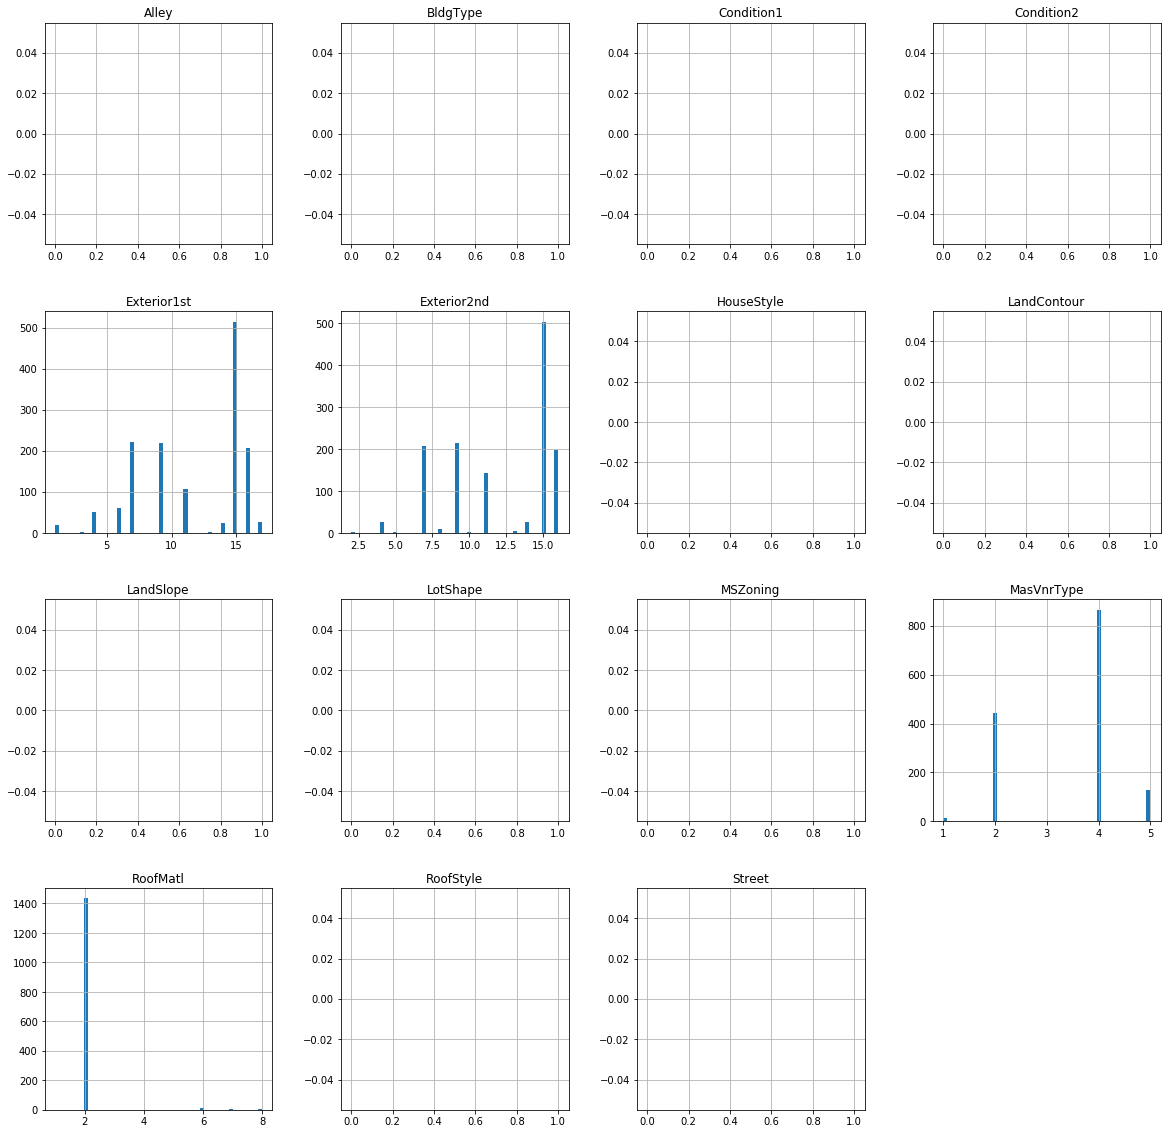

In [193]:
df_AD[ord_cat].hist(bins=50, figsize=(20,20))

# Ridge

In [229]:
# setting the number of cross validations used in the Model part 
nr_cv = 5

# switch for using log values for SalePrice and features     
use_logvals = 1    
# target used for correlation 
target = 'SalePrice_Log'
    
# only columns with correlation above this threshold value  
# are used for the ML Regressors in Part 3
min_val_corr = 0.4    
    
# switch for dropping columns that are similar to others already used and show a high correlation to these     
drop_similar = 1

### Some useful functions

In [202]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [203]:
def print_cols_large_corr(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    print (corr_abs.nlargest(nr_c, targ)[targ])

In [204]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

### Load merged datasets

In [225]:
df_train = pd.read_csv("data/trainmerged123_final.csv")
df_test = pd.read_csv("data/testmerged123_final.csv")

In [198]:
print(df_train.shape)
print("-"*20)
print(df_test.shape)

(1460, 117)
--------------------
(1459, 114)


In [199]:
print(df_train.info())
print("-"*20)
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 117 entries, Id_x to SalePrice
dtypes: float64(6), int64(107), object(4)
memory usage: 1.3+ MB
None
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 114 entries, MSSubClass to SaleCondition
dtypes: float64(14), int64(95), object(5)
memory usage: 1.3+ MB
None


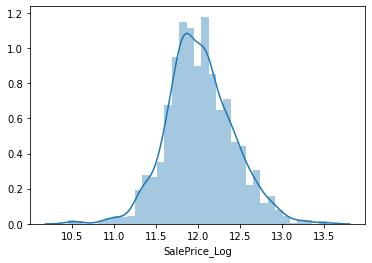

In [231]:
df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])

sns.distplot(df_train['SalePrice_Log']);


#### Datasets for ML 

In [237]:
df_train_woNeigh = df_train.drop(columns=['Neighborhood', 'GarageType', 'SaleType', 'SaleCondition'])
df_test_woNeigh = df_test.drop(columns=['Neighborhood', 'GarageType', 'SaleType', 'SaleCondition'])

In [238]:
df_train_woNeigh.head()

Id_x  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0     1          60     1.000       65.000     8450       2      1         1   
1     2          20     1.000       80.000     9600       2      1         1   
2     3          60     1.000       68.000    11250       2      1         2   
3     4          70     1.000       60.000     9550       2      1         2   
4     5          60     1.000       84.000    14260       2      1         2   

   LandContour  Utilities  LotConfig  LandSlope  Condition1  Condition2  \
0            1          1          1          3           3           3   
1            1          1          4          3           2           3   
2            1          1          1          3           3           3   
3            1          1          2          3           3           3   
4            1          1          4          3           3           3   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     1.000           4            7            5       2003          2003   
1     1.000           1            6            8       1976          1976   
2     1.000           4            7            5       2001          2002   
3     1.000           4            7            5       1915          1970   
4     1.000           4            8            5       2000          2000   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          2         2           15       15.000           2     196.000   
1          2         2            9        9.000           4       0.000   
2          2         2           15       15.000           2     162.000   
3          2         2           16          nan           4       0.000   
4          2         2           15       15.000           2     350.000   

   Foundation_CBlock  Foundation_PConc  Foundation_Slab  Foundation_Stone  \
0                  0                 1                0                 0   
1                  1                 0                0                 0   
2                  0                 1                0                 0   
3                  0                 0                0                 0   
4                  0                 1                0                 0   

   Foundation_Wood  BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  \
0                0                0                0                1   
1                0                1                0                0   
2                0                0                1                0   
3                0                0                0                1   
4                0                0                0                0   

   Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  Heating_Wall  \
0             1             0             0             0             0   
1             1             0             0             0             0   
2             1             0             0             0             0   
3             1             0             0             0             0   
4             1             0             0             0             0   

   CentralAir_Y  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  \
0             1                 0                 0               0   
1             1                 0                 0               0   
2             1                 0                 0               0   
3             1                 0                 0               0   
4             1                 0                 0               0   

   Electrical_SBrkr  BsmtFullBath_1  BsmtFullBath_2  BsmtFullBath_3  \
0                 1               1               0               0   
1                 1               0               0               0   
2                 1               1               0               0   
3                 1               1               0               0   
4         

In [239]:
X = df_train_woNeigh.copy()
y = df_train_woNeigh[target]
X_test = df_test_woNeigh.copy()

# X_sc = df_train_ml_sc.copy()
# y_sc = df_train[target]
# X_test_sc = df_test_ml_sc.copy()

X.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 114 entries, Id_x to SalePrice_Log
dtypes: float64(7), int64(107)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 110 entries, MSSubClass to YrSold
dtypes: float64(14), int64(95), object(1)
memory usage: 1.2+ MB


In [200]:
from sklearn.model_selection import GridSearchCV
score_calc = 'neg_mean_squared_error'

In [240]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv=nr_cv, verbose=1, scoring = score_calc)
grid_ridge.fit(X, y)

sc_ridge = get_best_score(grid_ridge)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtyp

C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn

C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn

C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn

C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn

C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn

C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Sandbox\Anaconda3\lib\site-packages\sklearn

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').